# *CIFAR-10 Veri Seti Kullanılarak Convolutional Neural Network (CNN) ile Görüntü Sınıflandırma*

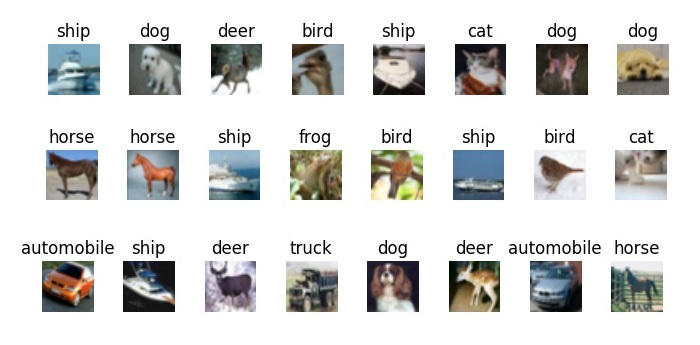

*Bu projede, CIFAR-10 veri seti kullanılarak derin öğrenme tabanlı bir görüntü sınıflandırma modeli geliştirilmiştir. CIFAR-10 veri seti; uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi ve kamyon olmak üzere 10 farklı sınıfa ait toplam 60.000 adet 32×32 boyutunda renkli görüntüden oluşmaktadır. Veri setinin 50.000 görüntüsü eğitim, 10.000 görüntüsü ise test amacıyla kullanılmıştır.*

*Model geliştirme sürecinde TensorFlow ve Keras kütüphaneleri kullanılarak bir Convolutional Neural Network (CNN) mimarisi oluşturulmuştur. Görüntüler ön işleme adımında normalize edilmiş ve sınıf etiketleri one-hot encoding yöntemi ile dönüştürülmüştür. Oluşturulan CNN modeli, evrişim (Conv2D), havuzlama (MaxPooling), tam bağlantılı (Dense) ve softmax çıkış katmanlarından oluşmaktadır.*

### *İmport Libraries*

In [1]:
import os                  # Dosya ve dizin işlemleri için
import random              # Rastgele seçimler yapmak için
import warnings            # Uyarı mesajlarını yönetmek için
warnings.filterwarnings('ignore') # Tüm uyarı mesajlarını görmezden gelmek için filterwarnings ile 'ignore' ayarını yapıyoruz

import numpy as np         # Sayısal hesaplamalar ve matris işlemleri
import pandas as pd        # Veri analizi ve tablo işlemleri
import cv2                 # Görüntü işleme ve video/frame işlemleri
import kagglehub           # Kaggle veri setlerini kolayca çekmek için

from sklearn.model_selection import train_test_split  # Veriyi eğitim/test setlerine ayırmak için

from tensorflow.keras.models import Model            # Keras Functional API model tanımı
from tensorflow.keras.layers import Flatten, Dense   # Katmanlar: Flatten ve tam bağlantılı Dense
from tensorflow.keras.applications import VGG16      # Önceden eğitilmiş VGG16 modeli
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Görüntü artırma ve ön işleme

### *İmport Data*

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### *Veri Ön İşleme*

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### *Classification*

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input

# Sequential model oluşturuyoruz, katman katman model ekleyebileceğiz
model = Sequential()

# Modelin giriş katmanını tanımlıyoruz
# Girdi boyutu: 170x170 piksel, 3 renk kanalı (RGB)
model.add(Input(shape=(32, 32, 3)))

# 1. Convolution (evrişim) katmanı
# 32 filtre, 3x3 boyutunda, aktivasyon fonksiyonu ReLU
# Görüntüden özellikler çıkarır
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# 1. MaxPooling katmanı
# 2x2 boyutunda, uzaysal boyutları küçültür ve hesaplamayı azaltır
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. Convolution katmanı
# 64 filtre, 3x3 boyutunda, aktivasyon fonksiyonu ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# 2. MaxPooling katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten katmanı
# Çok boyutlu veriyi tek boyuta indirger, Dense katmanına girdi olarak verir
model.add(Flatten())

# Tam bağlantılı (Dense) katman
# 128 nöron, ReLU aktivasyonu
# Görüntüden çıkarılan özellikleri birleştirir ve öğrenir
model.add(Dense(128, activation='relu'))

# Çıkış katmanı
# 1 nöron, sigmoid aktivasyonu
# Binary classification için 0-1 arasında tahmin verir
model.add(Dense(10, activation='softmax'))

# Modeli derliyoruz
# optimizer='adam' → ağırlıkları güncellemek için Adam optimizasyonu
# loss='binary_crossentropy' → binary sınıflandırma için uygun kayıp fonksiyonu
# metrics=['accuracy'] → eğitimi izlerken doğruluk metriğini hesaplar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Modeli eğitim verisiyle eğitiyoruz
history = model.fit(
    x_train,              # Girdi verileri (görüntüler)
    y_train,              # Hedef etiketler (0 veya 1)
    validation_data=(x_test, y_test),  # Her epoch sonunda test verisi ile doğrulama
    epochs=10,            # Modelin tüm eğitim verisi üzerinden 20 kez geçmesi
    verbose=1             # Eğitim sırasında ilerleme çubuğunu göster
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3962 - loss: 1.6543 - val_accuracy: 0.5874 - val_loss: 1.1613
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.6167 - loss: 1.0925 - val_accuracy: 0.6566 - val_loss: 1.0037
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6682 - loss: 0.9335 - val_accuracy: 0.6704 - val_loss: 0.9702
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.7118 - loss: 0.8269 - val_accuracy: 0.6841 - val_loss: 0.9197
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7441 - loss: 0.7324 - val_accuracy: 0.6999 - val_loss: 0.8879
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7728 - loss: 0.6479 - val_accuracy: 0.7063 - val_loss: 0.8827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7938 - loss: 0.5999 - val_accuracy: 0.7015 - val_loss: 0.9100
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.8145 -

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7052 - loss: 0.9889
Test Accuracy: 0.70169997215271


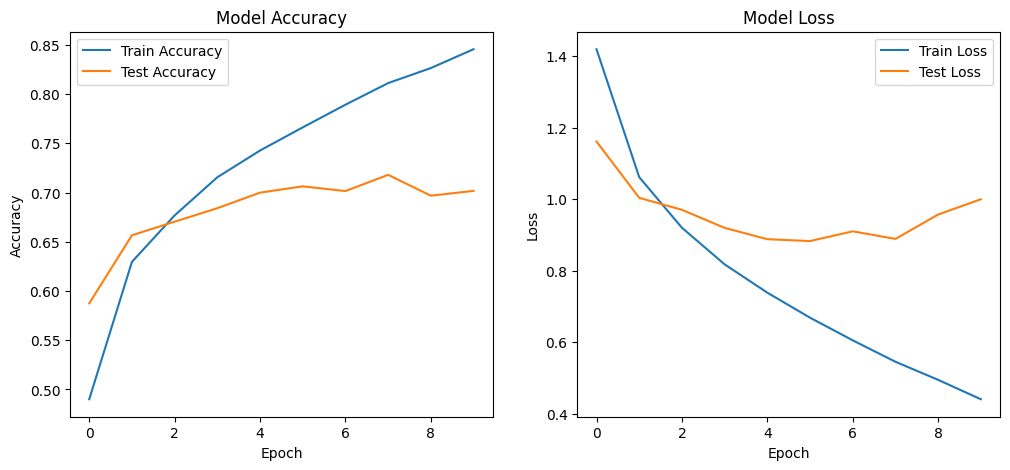

In [13]:
import matplotlib.pyplot as plt

# Accuracy ve Loss grafiklerini çizme
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model.save('cifar_10.keras')

*Model, CIFAR-10 veri setinde eğitilmiş bir CNN ile test edilmiştir. Eğitim doğruluğu ~%85’e ulaşırken, test doğruluğu ~%70 civarında kalmıştır. Kayıp değerleri de benzer şekilde, eğitimde azalırken testte sabit kalmıştır. Bu sonuçlar, modelin görüntüleri sınıflandırmada başarılı olduğunu ancak hafif overfitting olduğunu göstermektedir.*